In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

import warnings

import glob
import pandas as pd
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

from scipy.optimize import curve_fit

In [6]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

def abrir_reguly(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[1:]
    enlaces = []
    for linea in data:
      enlaces.append(linea[:2])
    return(enlaces)

In [7]:
Data_Y2H = abrir_txt('TC03_data/yeast_Y2H.txt')
Data_APMS = abrir_txt('TC03_data/yeast_AP-MS.txt')
Data_LIT = abrir_txt('TC03_data/yeast_LIT.txt')
Data_LIT_Reguly = abrir_reguly('TC03_data/yeast_LIT_Reguly.txt')


Red_Y2H=nx.Graph()
Red_Y2H.add_edges_from(Data_Y2H)
Red_APMS=nx.Graph()
Red_APMS.add_edges_from(Data_APMS)
Red_LIT=nx.Graph()
Red_LIT.add_edges_from(Data_LIT)
Red_LIT_Reguly=nx.Graph()
Red_LIT_Reguly.add_edges_from(Data_LIT_Reguly)

redes_lista = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]

In [8]:
Data_esenciales = abrir_txt('TC03_data/Essential_ORFs_paperHe.txt')
print(Data_esenciales)

def abrir_esenciales(nombre_archivo):
    archivo = open(nombre_archivo)
    data = []
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    data = data[2:]
    esenciales = []
    for linea in data:
      if len(linea)>2:
        esenciales.append(linea[1])
    return(esenciales)

lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')
print (lista_esenciales)

[['rec_num', 'ORF_name', 'deletion_alias', 'gene_names', 'UPTAG_sequence_20mer', 'DNTAG_sequence_20mer'], ['=====', '=========', '==============', '=====================================================', '====================', '===================='], ['20406', 'YAL001C', 'TSV115,', 'FUN24', 'ACTATATGTGAAGGCATGGC'], ['20404', 'YAL003W', 'TEF5', 'GACATATCAGCATACATGGC'], ['20383', 'YAL025C', 'TGCCGCATCAAAGAGGCCAA'], ['20376', 'YAL032C', 'FUN20', 'TGATCCGCGTCGATGCTCTT'], ['20375', 'YAL033W', 'FUN53', 'CTGACTTAGTGCATACTGCT'], ['20372', 'YAL034W-a', 'NSL2,', 'DSN3', 'GGACCTCTGCTCATTATGCT'], ['20373', 'YAL035C-A', 'ATTGGTCACTCTGCACTGCT'], ['20368', 'YAL038W', 'PYK1', 'ATTGAGAGTCAGTGCCAGAT'], ['20365', 'YAL041W', 'CLS4', 'TATGGACTGGCATCACCGTG'], ['20362', 'YAL043C', 'FUN39', 'AGTCCATGCAGCACTCTTGG'], ['20409', 'YAR007C', 'RPA1,', 'FUN3,', 'BUF2', 'GCAGTGCGTGAACCTCTATC'], ['20410', 'YAR008W', 'FUN4', 'CATGAGAGTGAAGCAGTATC'], ['20416', 'YAR019C', 'LYT1', 'GCGCTTATCACATTTGACAG'], ['23028', 'YBL0

In [9]:
def segundo_elemento(lista):
  return lista[1]

def hacer_lista_grados_ordenada(Red):
  grados = Red.degree()
  grados = list(grados)
  grados.sort(key = segundo_elemento, reverse = True)
  return [nodo for (nodo,grado) in grados]

def ordenar_diccionario_por_valor(diccionario):
  return [key for key, value in sorted(diccionario.items(), key=lambda item: item[1], reverse=True)]

def armar_componente_gigante(Red):
  Conjunto_nodos_en_gigante = max(nx.connected_components(Red), key=len)
  Componente_Gigante = Red.subgraph(Conjunto_nodos_en_gigante).copy()
  return Componente_Gigante

In [10]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]


In [11]:
# Quiero armar la tabla 1 de Zotenko: Number of nodes, Number of edges, Average degree, Average clustering coefficient, para cada red

def elementos_tabla(Red):
	# Me quedo solo con la componente gigante
	Red_gigante = armar_componente_gigante(Red)

	nodos = Red_gigante.number_of_nodes()
	enlaces = Red_gigante.number_of_edges()
	promedio_grados = np.mean([grado for (nodo,grado) in list(Red_gigante.degree())])
	clustering = nx.average_clustering(Red_gigante)
	
	return (nodos,enlaces,promedio_grados,clustering)

tabla1 = pd.DataFrame(columns = ['Red', 'Nodos', 'Enlaces', 'Grado promedio', 'Coeficiente de clustering'])
for red in redes_lista:
	nodos, enlaces, promedio_grados, clustering = elementos_tabla(red)
	df = pd.DataFrame({'Red' : retrieve_name(red), 'Nodos' : nodos, 'Enlaces' : enlaces, 
										   'Grado promedio' : promedio_grados, 'Coeficiente de clustering' : clustering}, index=[0])
	tabla1 = pd.concat([tabla1, df])

tabla1 = tabla1.reset_index(drop=True)
tabla1



C:\Users\arell\AppData\Local\Temp\ipykernel_13836\2303736355.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla1 = pd.concat([tabla1, df])


,Red,Nodos,Enlaces,Grado promedio,Coeficiente de clustering
0,Red_Y2H,1647,2682,3.256831,0.056600
1,Red_APMS,1004,8319,16.571713,0.647514
2,Red_LIT,1213,2621,4.321517,0.327861
3,Red_LIT_Reguly,3224,11789,7.313275,0.265685


In [12]:
# Quiero armar la tabla 2 de Zotenko, donde se muestre el overlap entre las redes

overlap = []
for i in range(len(redes_lista)):
	Red1 = redes_lista[i]
	edges_1 = set(Red1.edges())

	for j in range(len(redes_lista)):

		if i !=j :
			Red2 = redes_lista[j]
			edges_2 = set(Red2.edges())
		
			intersecting_edges = edges_1 & edges_2
			# print(intersecting_edges)
			valor = len(intersecting_edges)/Red1.number_of_edges()
			overlap.append(round(valor,3))

		if i == j:
			overlap.append(retrieve_name(redes_lista[i]))

lista = np.array(overlap).reshape(4,4)
pd.DataFrame(lista)

,0,1,2,3
0,Red_Y2H,0.06,0.053,0.09
1,0.019,Red_APMS,0.084,0.145
2,0.053,0.259,Red_LIT,0.619
3,0.022,0.111,0.153,Red_LIT_Reguly


In [13]:
def calcular_fraccion_esenciales(Red,lista_esenciales):
  proporcion_hubs = np.linspace(0.001, 1, 5000) ## achico la fraccion minima para que pueda explorar todo el espacio
  orden_grados = hacer_lista_grados_ordenada(Red)
  fraccion_hubs_esenciales = []
  for proporcion in proporcion_hubs:
    cantidad_hubs = int(len(Red.nodes())*proporcion)
    hubs_esenciales = set(orden_grados[:cantidad_hubs]).intersection(lista_esenciales)
    fraccion_hubs_esenciales.append(len(hubs_esenciales)/cantidad_hubs)
  return (proporcion_hubs,fraccion_hubs_esenciales)

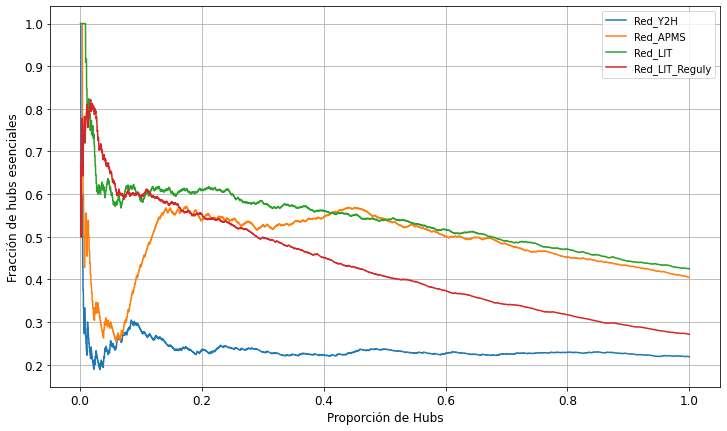

In [14]:
# Quiero armar la figura 1 de Zotenko, donde se muestra la fracción de hubs esenciales en función de la fracción de hubs
lista_esenciales = abrir_esenciales('TC03_data/Essential_ORFs_paperHe.txt')

plt.figure(figsize=(12,7))
plt.xlabel('Proporción de Hubs', fontsize = 12)
plt.ylabel('Fracción de hubs esenciales', fontsize = 12)
plt.tick_params(labelsize = 12) #Ancho de los numeros de los ejes 

plt.grid('True')

# labels = ['Y2H', ' LIT', 'LIT Reg', 'AP-MS']
for i in range(len(redes_lista)):

	Red = redes_lista[i]
	Red_gigante= armar_componente_gigante(Red)
	hubs, fraccion = calcular_fraccion_esenciales(Red_gigante, lista_esenciales)

	plt.plot(hubs, fraccion, label = retrieve_name(redes_lista[i]))
	plt.legend()

{'A': 10, 'B': 13, 'C': 12, 'D': 10, 'E': 8, 'F': 8, 'G': 8, 'H': 10, 'I': 11, 'J': 12, 'K': 10, 'L': 12, 'M': 13, 'N': 13, 'O': 13, 'P': 10, 'Q': 7, 'R': 5, 'S': 6, 'T': 9, 'U': 10, 'V': 9, 'W': 9, 'X': 9, 'Y': 11, 'Z': 9, '[': 6, '\\': 12, ']': 11, '^': 12, '_': 8, '`': 6, 'a': 14, 'b': 11, 'c': 11, 'd': 9, 'e': 10, 'f': 11, 'g': 12, 'h': 14, 'i': 12, 'j': 10, 'k': 8, 'l': 13, 'm': 8, 'n': 13, 'o': 12, 'p': 11, 'q': 15, 'r': 4}


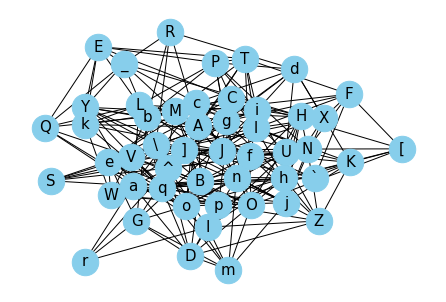

In [15]:
# Red de juguete para hacer pruebas, 20 nodos con enlaces aleatorios
G = nx.erdos_renyi_graph(50, 0.2)

mapping = {i: chr(65 + i) for i in range(len(G.nodes()))}
G = nx.relabel_nodes(G, mapping)

# Verifico los grados de los nodos
print(dict(G.degree()))

nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_color='black')
plt.show()

In [16]:
# Quiero armar la figura 3 de Zotenko, donde veo como se muere la componente gigante al ir sacando nodos

def desarmar_red(Red,funcion_sacar, fraccion_inicial = 0.5, plot = False, plot_desarme = False):
	componente_gigante = armar_componente_gigante(Red)
	tamano_inicial = len(componente_gigante.nodes())
	if plot == True:
		plt.figure()
		nx.draw(componente_gigante, node_size=10, linewidths = 0.1, node_color='skyblue', font_size=15, font_color='black')

	fraccion_quitados = []
	lista_fraccion_restante = []

	i = 1
	while i<tamano_inicial*fraccion_inicial:
		# print(tamano_inicial)
		# print(i)
		try:
			# Tomamos el nodo a sacar usando la funcion pasada
			fraccion_restante = (len(componente_gigante.nodes())/tamano_inicial)
			# print(fraccion_restante)
			nodo_sacar = funcion_sacar(componente_gigante)
			# print(nodo_sacar)
			# Lo sacamos
			componente_gigante.remove_node(nodo_sacar)
			# Nos quedamos con la nueva componente gigante
			componente_gigante = armar_componente_gigante(componente_gigante)
			if plot_desarme:
				plt.figure()
				nx.draw(componente_gigante, with_labels=True, node_size=700, node_color='skyblue', font_size=15, font_color='black')
			# Guardamos la fracción que queda
			
			lista_fraccion_restante.append(fraccion_restante)
			# Guardamos la fracción que ya sacamos
			fraccion_quitados.append(i/tamano_inicial)
			comp_out = componente_gigante.copy()

			# print(i)
			
			i=i+1
		except:

			break

	return (fraccion_quitados,lista_fraccion_restante, comp_out)

In [17]:
#Voy a armar la función que saca el nodo de mayor grado
def sacar_grado(Red):
	grados = Red.degree()
	grados = list(grados)
	grados.sort(key = segundo_elemento, reverse = True)
	return grados[0][0]

#Voy a armar la función que saca nodos de a uno tomandolos de forma aleatoria
def sacar_aleatorio(Red):
	nodos = list(Red.nodes())
	nodo = random.choice(nodos)
	return nodo

#Voy a armar la función que saca nodos segun su centralidad de cercanía
def sacar_cercania(Red):
	diccionario_centralidad_cercania = nx.closeness_centrality(Red, u=None, distance=None, wf_improved=True)
	nodo = max(diccionario_centralidad_cercania, key=diccionario_centralidad_cercania.get)
	return nodo

#Ahora voy a hacer la funcion que saca nodos segun su betweenness
def sacar_betweenness(Red):
	diccionario_betweenness = nx.betweenness_centrality(Red)
	nodo = max(diccionario_betweenness, key=diccionario_betweenness.get)
	return nodo

# Por ultimo voy a hacer la funcion que saca nodos segun su centralidad de autovalor
def sacar_autovalor(Red):
	diccionario_centralidad_autovalor = nx.eigenvector_centrality(Red, max_iter=5000, tol=1e-06, nstart=None, weight='weight')
	nodo = max(diccionario_centralidad_autovalor, key=diccionario_centralidad_autovalor.get)
	return nodo

In [18]:
def graficoDesarmar(Red, lista_metodos, plot = False, saveplot = False, **kwargs):
	quitados = np.zeros(len(lista_metodos), dtype = object)
	restantes = np.zeros(len(lista_metodos), dtype = object)
	plt.figure(**kwargs)
	for i in range(len(lista_metodos)):

		print('***** ', str(lista_metodos[i].__name__), '*****')

		salida = desarmar_red(Red, lista_metodos[i], 0.8)
		quitados[i] = salida[0]
		restantes[i] = salida[1]
		if plot:
			plt.plot(salida[0], salida[1], label = str((lista_metodos[i]).__name__[6:]))
	if plot:	
		plt.legend() 
	if saveplot and plot:
		plt.savefig('Desarme.png', dpi = 300)
	return (quitados, restantes)

### Graficos de desarme

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


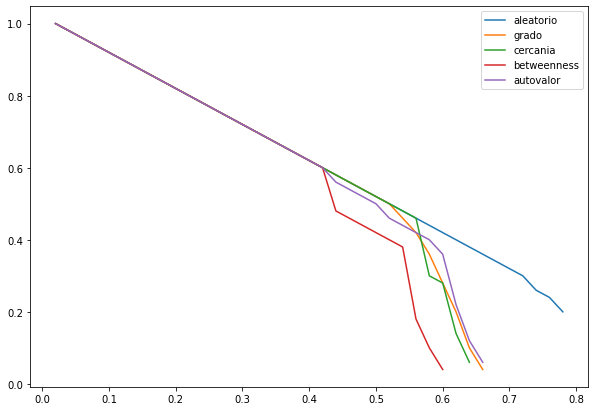

In [58]:
#Prueba con una red de juguete
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor] 
output = graficoDesarmar(G, lista_metodos, figsize = (10,7));

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


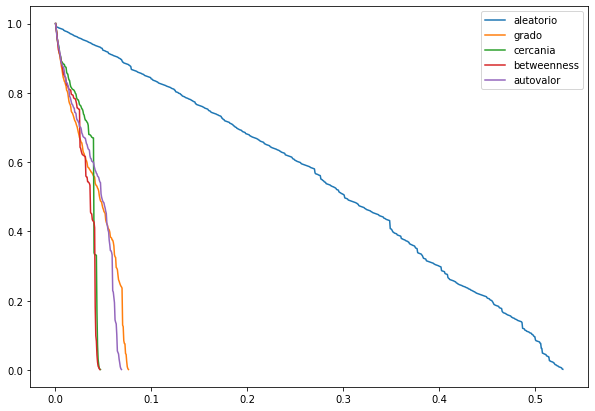

In [60]:
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor]
output = graficoDesarmar(Red_Y2H, lista_metodos, figsize = (10,7)); #18min

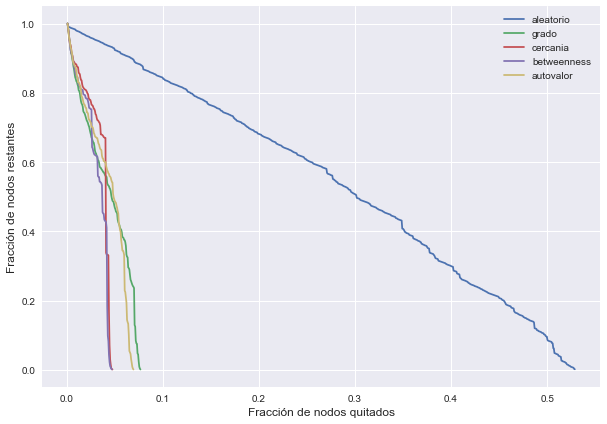

In [66]:
plt.figure(figsize=(10,7))
for i in range(len(output[0])):
    plt.style.use('seaborn')
    plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
    plt.legend()
    plt.xlabel('Fracción de nodos quitados', fontsize = 12)
    plt.ylabel('Fracción de nodos restantes', fontsize = 12)

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


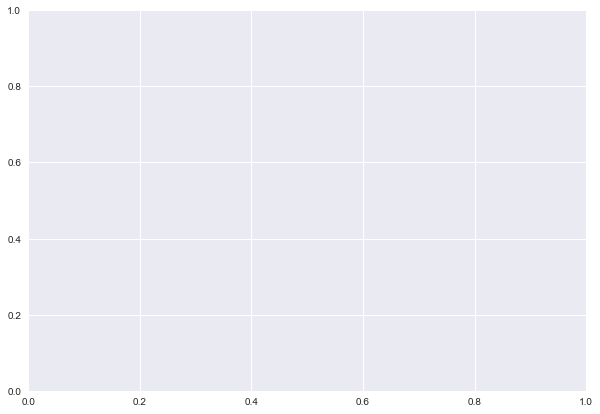

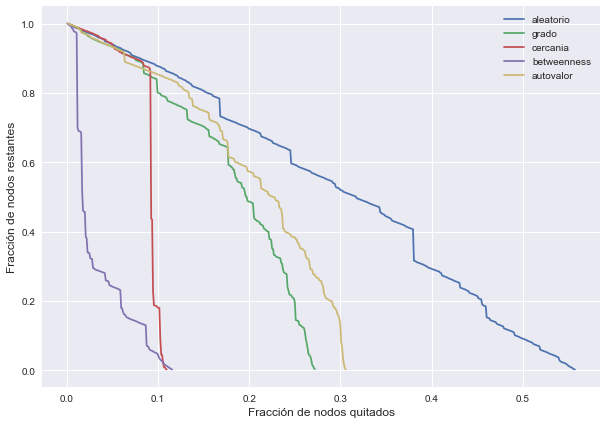

In [212]:
#Para la red APMS #54min en mi pc
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor]
output = graficoDesarmar(Red_APMS, lista_metodos, figsize = (10,7))

plt.figure(figsize=(10,7))
for i in range(len(output[0])):
    plt.style.use('seaborn')
    plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
    plt.legend()
    plt.xlabel('Fracción de nodos quitados', fontsize = 12)
    plt.ylabel('Fracción de nodos restantes', fontsize = 12)

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


<Figure size 720x504 with 0 Axes>

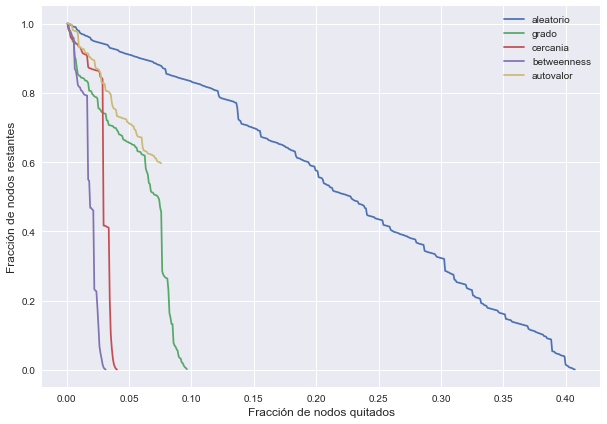

In [214]:
# Para la red LIT #18min
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor]
output = graficoDesarmar(Red_LIT, lista_metodos, figsize = (10,7))

plt.figure(figsize=(10,7))
for i in range(len(output[0])):
    plt.style.use('seaborn')
    plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
    plt.legend()
    plt.xlabel('Fracción de nodos quitados', fontsize = 12)
    plt.ylabel('Fracción de nodos restantes', fontsize = 12)

*****  sacar_aleatorio *****
*****  sacar_grado *****
*****  sacar_cercania *****
*****  sacar_betweenness *****
*****  sacar_autovalor *****


<Figure size 720x504 with 0 Axes>

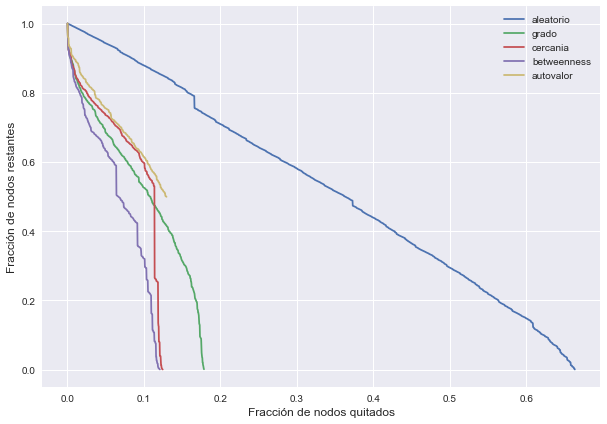

In [215]:
# Para la red LIT Reguly 
lista_metodos = [sacar_aleatorio, sacar_grado, sacar_cercania, sacar_betweenness, sacar_autovalor]
output = graficoDesarmar(Red_LIT_Reguly, lista_metodos, figsize = (10,7))

plt.figure(figsize=(10,7))
for i in range(len(output[0])):
	plt.style.use('seaborn')
	plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
	plt.legend()
	plt.xlabel('Fracción de nodos quitados', fontsize = 12)
	plt.ylabel('Fracción de nodos restantes', fontsize = 12)

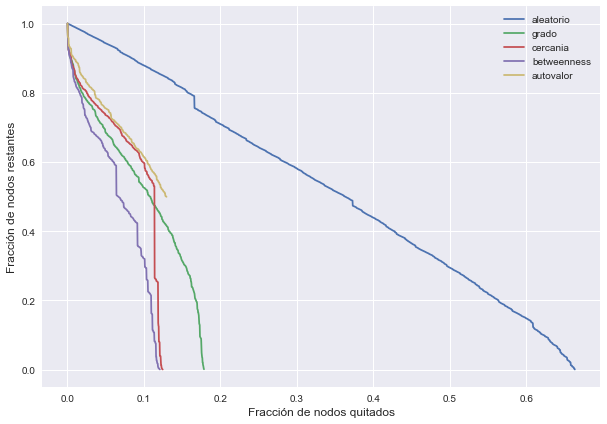

In [216]:
plt.figure(figsize=(10,7))
for i in range(len(output[0])):
	plt.style.use('seaborn')
	plt.plot(output[0][i], output[1][i], label = str((lista_metodos[i]).__name__[6:]))
	plt.legend()
	plt.xlabel('Fracción de nodos quitados', fontsize = 12)
	plt.ylabel('Fracción de nodos restantes', fontsize = 12)
	plt.savefig('Desarme_LITReg.png', dpi = 300)

### Tabla 3 Zotenko

In [19]:
# Voy a hacer la tabla 3 de Zotenko, donde veo la fraccion de nodos restantes en la componente gigante luego de eliminar los nodos escenciales y N nodos aleatorios
def sacar_esenciales(Red,lista_esenciales):
	Red2 = Red.copy()
	Red2.remove_nodes_from(lista_esenciales)
	return Red2

def eliminar_aleatorio(Red, lista_esenciales):
	Red_copy = Red.copy()
	for nodo in lista_esenciales:
		try:
			# print(nodo)
			grado = Red_copy.degree(nodo)
			nodos_mismo_grado = [n for n in Red_copy.nodes() if Red_copy.degree(n) == grado]
			# print(nodos_mismo_grado)
			rand = random.choice(nodos_mismo_grado)
			# print('++', rand)
			Red_copy.remove_node(rand)
		except:
			pass
	return Red_copy

In [20]:
# Armo la tabla 3, hago un dataframe de pandas con lo mismo de antes

def elementos_tabla3(Red, lista_esenciales):
	Red_sin_esenciales = sacar_esenciales(Red, lista_esenciales)
	Red_gigante = armar_componente_gigante(Red_sin_esenciales)

	nodos = Red_gigante.number_of_nodes()
	fraccion_sin_esenciales = nodos/Red.number_of_nodes()

	fraccion_aleatoria = eliminar_aleatorio(Red, lista_esenciales).number_of_nodes()/Red.number_of_nodes()
	
	return (fraccion_sin_esenciales, fraccion_aleatoria)

In [21]:
lista_redes = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]
tabla3 = pd.DataFrame(columns = ['Red', 'Fracción sin esenciales', 'Fracción aleatoria'])

for red in lista_redes:
	print(retrieve_name(red))
	fraccion_sin_esenciales, fraccion_aleatoria = elementos_tabla3(red, lista_esenciales)
	df = pd.DataFrame({'Red' : retrieve_name(red), 'Fracción sin esenciales' : fraccion_sin_esenciales, 'Fracción aleatoria' : fraccion_aleatoria}, index=[0])
	tabla3 = pd.concat([tabla3, df])

tabla3 = tabla3.reset_index(drop=True)
tabla3

Red_Y2H


C:\Users\arell\AppData\Local\Temp\ipykernel_13836\1940197564.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla3 = pd.concat([tabla3, df])


Red_APMS
Red_LIT
Red_LIT_Reguly


,Red,Fracción sin esenciales,Fracción aleatoria
0,Red_Y2H,0.509415,0.790882
1,Red_APMS,0.200370,0.683107
2,Red_LIT,0.222005,0.660807
3,Red_LIT_Reguly,0.560629,0.760810


In [23]:
## Hago la parte de las probabilidades
def ObtenerGradoMax(Red):
	Dgres = []
	for N in Red.nodes():
		Dgres.append(Red.degree(N))
	return max(Dgres)

In [24]:
# Inicializamos las listas para almacenar las fracciones de esenciales y los grados
FracEssRedes = []
GradosLnRedes = []

# Iteramos sobre cada red en la lista de redes
for Red in lista_redes:
	# Obtenemos el grado máximo de la red
	Gradomax = ObtenerGradoMax(Red)
	print(Gradomax)
	
	# Creamos una lista de grados desde 0 hasta el grado máximo
	ListaDeGrados = range((Gradomax + 1))
	GradosLn = []
	FracEss = []

	# Iteramos sobre cada grado en la lista de grados
	for Grado in ListaDeGrados:
		NodosEscencialesGrado = []
		NodosGrado = []

		# Iteramos sobre cada nodo en la red
		for Nodo in Red.nodes():
			# Verificamos si el grado del nodo es igual al grado actual
			if Red.degree(Nodo) == Grado:
				NodosGrado.append(1)
				# Verificamos si el nodo es esencial
				if Nodo in lista_esenciales:
					NodosEscencialesGrado.append(1)
				else:
					NodosEscencialesGrado.append(0)
			else:
				NodosGrado.append(0)

		# Calculamos la fracción de nodos esenciales para el grado actual
		if sum(NodosGrado) != 0:
			FracEss.append(sum(NodosEscencialesGrado) / sum(NodosGrado))
			GradosLn.append(Grado)

	# Añadimos las listas de fracciones y grados a las listas principales
	FracEssRedes.append(FracEss)
	GradosLnRedes.append(GradosLn)

91
127
40
320


In [25]:
LnRedes = []
ListGradosRedes = []
for v in range(len(FracEssRedes)):
	Prob1 = []
	Prob2 = []
	for j in range(len(FracEssRedes[v])):
		if FracEssRedes[v][j]<1:
			Prob1.append(np.log(1-FracEssRedes[v][j])) # la probabilidad es la fraccion sobre el total, frecuentista
			Prob2.append(GradosLnRedes[v][j])
			
	LnRedes.append(Prob1)
	ListGradosRedes.append(Prob2)

In [26]:
def Recta(x,m,b):
	return m*x+b

def ObtenerAlfaBeta(Dom,Imag,Nombre):

	p0 = [-1.,0.]
	popt,pcov = curve_fit(Recta, Dom, Imag, p0=p0, absolute_sigma=True)
	# perr = np.sqrt(np.diag(pcov))

	Alfa = (np.exp(popt[0])-1)*(-1)
	Beta = (np.exp(popt[1])-1)*(-1)

	print(Nombre + ': Alfa = '+ str(Alfa) + ' ; Beta = '+str(Beta))
	return popt

Y2H: Alfa = 0.016200472630323204 ; Beta = 0.172226437110519
LIT: Alfa = 0.02592880276042775 ; Beta = 0.28421202588036476
APMS: Alfa = 0.002918758848377112 ; Beta = 0.5173277508954026
LIT_Reguly: Alfa = 0.01596456038320415 ; Beta = 0.30010941135529834


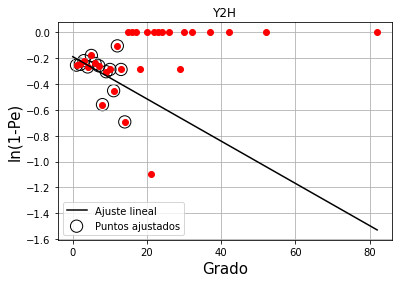

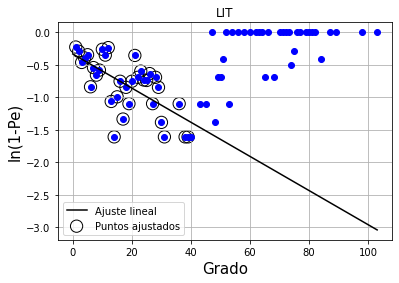

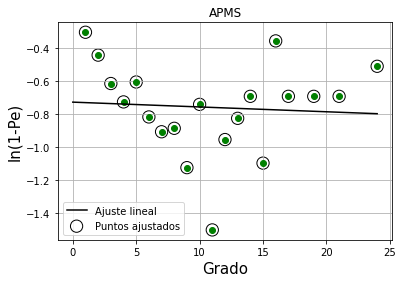

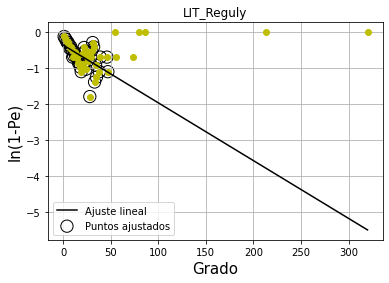

In [76]:
gradomax=[15,40,50,50] #Tomo a mano que puntos voy a ajustar

Colores = ['ro','bo','go','yo']
NombresRed = ['Y2H','LIT','APMS', 'LIT_Reguly']

dictAlfaBeta = {}

for t in range(len(NombresRed)):
	plt.figure()
	plt.plot(ListGradosRedes[t],LnRedes[t],Colores[t])
	plt.title(NombresRed[t])
	plt.xlabel('Grado', size = 15)
	plt.ylabel('ln(1-Pe)', size = 15)
	plt.grid()

	maskt = np.array(ListGradosRedes[t]) < gradomax[t]
	A= ObtenerAlfaBeta(np.array(ListGradosRedes[t])[maskt],np.array(LnRedes[t])[maskt],NombresRed[t]) 

	X = np.linspace(0,max(ListGradosRedes[t]),100)
	Y = float(A[0])*X+float(A[1])
	plt.plot(X,Y,'k',label='Ajuste lineal')

	plt.scatter(np.array(ListGradosRedes[t])[maskt],np.array(LnRedes[t])[maskt],s=150, facecolors='none', edgecolors='k',label='Puntos ajustados')
	plt.legend()
	# plt.xlim(0,max(np.array(ListGradosRedes[t])[maskt])+0.6*max(np.array(ListGradosRedes[t])[maskt]))
	# plt.ylim(min(np.array(LnRedes[t])[maskt])+0.1*min(np.array(LnRedes[t])[maskt]),0.1)

	dictAlfaBeta[NombresRed[t]] = {'Alfa': float(A[0]), 'Beta': float(A[1])}


In [77]:
def VecinosEnComun(V1,V2):
  Comunes=[]
  for Vec1 in V1:
    for Vec2 in V2:
      if Vec1 == Vec2:
        Comunes.append(1)
      else:
        Comunes.append(0)
  return sum(Comunes)

def PeTeo(k,A,B):
  Pe = 1-(1-B)*((1-A)**k)
  return Pe

In [78]:
def pares_teorico(Red, lista_esenciales, alfa, betta):

	ParesMismoTipoRedC3 = [] 
	
	enlaces_escenciales = 0
	enlaces_no_escenciales = 0
	for N1 in Red.nodes(): 
		VN1 = list(nx.all_neighbors(Red,N1)) 
		Pe1 = PeTeo(Red.degree(N1),alfa,betta)

		for N2 in Red.nodes():
			if N1 != N2:
				VN2 = list(nx.all_neighbors(Red,N2)) 
				VC = VecinosEnComun(VN1,VN2)
				Pe2 = PeTeo(Red.degree(N2),alfa,betta)

				if (N1 not in VN2 ):
					if VC >= 2: 
						PIguales = Pe1*Pe2 + (1-Pe1)*(1-Pe2) 
						# print(PIguales, Pe1, Pe2)
						# if k == 0:
						if N1 in lista_esenciales and N2 in lista_esenciales:
							# print('aca')
							enlaces_escenciales += 1
						elif N1 not in lista_esenciales and N2 not in lista_esenciales:
							# print('aca2')
							enlaces_no_escenciales += 1
						ParesMismoTipoRedC3.append(1/2)  #1/2 para no contar 2 veces los mismos pares de nodos
	C3 = sum(ParesMismoTipoRedC3)
		
	return (enlaces_escenciales+enlaces_no_escenciales, C3)

In [61]:
pares_teorico(Red_Y2H, lista_esenciales, dictAlfaBeta['Y2H']['Alfa'], dictAlfaBeta['Y2H']['Beta'])

(3028, 2258.0)

In [80]:
lista_redes = [Red_Y2H, Red_APMS, Red_LIT, Red_LIT_Reguly]
tabla5 = pd.DataFrame(columns = ['Red', 'Numero de pares del mismo tipo', 'Numero de pares esperados del mismo tipo'])

for red in lista_redes:
	print(retrieve_name(red))

	pares_teorico_value = pares_teorico(red, lista_esenciales, dictAlfaBeta[retrieve_name(red)[4:]]['Alfa'], dictAlfaBeta[retrieve_name(red)[4:]]['Beta'])
	cantidad_pares_real = pares_teorico_value[0]
	cantidad_pares_teorico = pares_teorico_value[1]

	df = pd.DataFrame({'Red' : retrieve_name(red), 'Numero de pares del mismo tipo' : cantidad_pares_real,
					 'Numero de pares esperados del mismo tipo' : cantidad_pares_teorico}, index=[0])
	
	tabla5 = pd.concat([tabla5, df])

tabla5 = tabla5.reset_index(drop=True)
tabla5

Red_Y2H


C:\Users\arell\AppData\Local\Temp\ipykernel_13836\3080343503.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabla5 = pd.concat([tabla5, df])


Red_APMS
Red_LIT
Red_LIT_Reguly


,Red,Numero de pares del mismo tipo,Numero de pares esperados del mismo tipo
0,Red_Y2H,3028,2258.0
1,Red_APMS,15480,15467.0
2,Red_LIT,2094,1858.0
3,Red_LIT_Reguly,51796,43027.0
